# Simulation Models

## Introduction

In [3]:
import sys
import random
import numpy as np
import pylab
from scipy import stats

In [4]:
sys.path.insert(0, '../src/simulation')
from environment import Environment
from predator import Predator

In [5]:
params = {
    'env_size': 1000,
    'n_patches': 20,
    'n_trials': 100,
    'max_moves': 5000,
    'max_entities_per_patch': 50,
    'min_entities_per_patch': 5,
}

In [7]:
entity_results = []
captured_results = []

for trial in range(params['n_trials']):
    # Set up the environment
    env = Environment(params['env_size'], params['env_size'], params['n_patches'])
    entities = random.randint(
        params['min_entities_per_patch'],
        params['max_entities_per_patch']
    )
    for patch in env.children:
        patch.create_entities(entities)

    pred = Predator()
    pred.xpos = env.length / 2.0
    pred.y_pos = env.width / 2.0
    pred.parent = env

    for i in range(params['max_moves']):
        pred.move()
        entity = pred.detect()
        pred.capture(entity)

    entity_results.append(entities)
    captured_results.append(len(pred.captured))


Slope, intercept: 0.4133224334025436 2.01803111944251
R-squared: 0.10630657435539556
Residual Std Error =  16.701383711044606


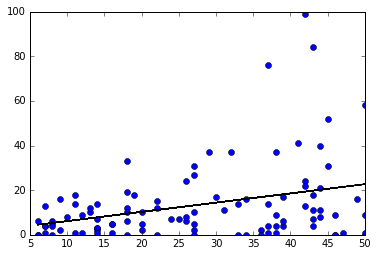

In [8]:
x = np.array(entity_results)
y = np.array(captured_results)

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x, y)

print "Slope, intercept:", slope, intercept
print "R-squared:", r_value**2

# Calculate some additional outputs
predict_y = intercept + slope * x
pred_error = y - predict_y
degrees_of_freedom = len(x) - 2
residual_std_error = np.sqrt(np.sum(pred_error**2) / degrees_of_freedom)
print "Residual Std Error = ", residual_std_error

# Plotting
pylab.plot(x, y, 'o')
pylab.plot(x, predict_y, 'k-')
pylab.show()


In [19]:
z = np.divide(np.multiply(y, 1.0), np.multiply(x, 1.0))

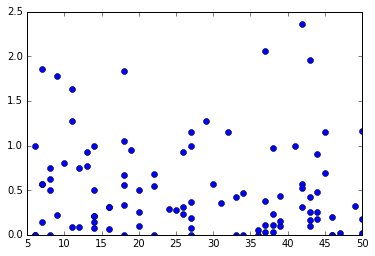

In [20]:
pylab.plot(x, z, 'o')